# Eclectic Genetic Algorithm

In [1]:
DIM = 100  # Number of bits in the bit strings (i.e. the "models").
NOISE_STDEV = 0.01  # Standard deviation of the simulated training noise.

class Model(object): 
    def __init__(self):
        self.arch = None
        self.accuracy = None
    
    def __str__(self):
        return '{0:b}'.format(self.arch)

def train_and_eval(arch):
    accuracy =  float(_sum_bits(arch)) / float(DIM)
    accuracy += random.gauss(mu=0.0, sigma=NOISE_STDEV)
    accuracy = 0.0 if accuracy < 0.0 else accuracy
    accuracy = 1.0 if accuracy > 1.0 else accuracy
    return accuracy

def _sum_bits(arch):
    total = 0
    for _ in range(DIM):
        total += arch & 1
        arch = (arch >> 1)
    return total

In [20]:
import random
mutation_rate = 0.01

def random_architecture():
    return random.randint(0, 2**DIM - 1)

def mutate_arch(parent_arch):
    child_arch = parent_arch
    for i in range(int(mutation_rate*DIM)):
    # Flip the bit at a random position in `child_arch`.
        child_arch = child_arch ^ (1 << random.randint(0, DIM - 1))
  
    return child_arch
x = random_architecture()
mx = mutate_arch(x)
print(bin(x), len(bin(x)))
print(bin(mx), len(bin(mx)))
print(x, mx)

0b1101010011000011011000111010001100101011000111011100110010011000000010110111100001000010101110001000 102
0b1101010011000011011000111010001110101011000111011100110010011000000010110111100001000010101110001000 102
1053552530258527354233750301576 1053552530406101306823426714504


In [21]:
def crossing_arch(parent_arch1, parent_arch2):
    str1 = bin(parent_arch1)[2:]
    str2 = bin(parent_arch2)[2:]
    while len(str1) < DIM:
        str1 = '0' + str1
    while len(str2) < DIM:
        str2 = '0' + str2
    pos1 = random.randint(0,DIM)
    pos2 = random.randint(0,DIM)
    if pos2 < pos1:
        temp = pos1
        pos1 = pos2
        pos2 = temp
    
    new_str1 = str1[:pos1] + str2[pos1:pos2] + str1[pos2:]
    new_str2 = str2[:pos1] + str1[pos1:pos2] + str2[pos2:]
    
    return int(new_str1, 2), int(new_str2, 2)

x = random_architecture()
y = random_architecture()
z,w = crossing_arch(x,y)
print(x,y)
print(z,w)

377355057391199422144642806549 425591242555625715747014655218
385977161298493523487422149397 416969138648331614404235312370


In [22]:
def cross_and_mutate_population(population, sample_size):
    partial_history = []
        
    sample = []
    while len(sample) < sample_size:
        sample.append(random.choice(population))
    parent = max(sample, key = lambda i: i.accuracy)
    
    child = Model()
    child.arch = mutate_arch(parent.arch)
    child.accuracy = train_and_eval(child.arch)
    partial_history.append(child)
    
    i = 0 
    while i < len(population) and child.accuracy < population[i].accuracy:
        i += 1
    if i < len(population): 
        population = population[:i] + [child] + population[i:-1]    
        
    temp = population
    # Full crossover
    while 1 < len(temp): 
        parent1 = temp[0] #max(temp, key=lambda i: i.accuracy)
        parent2 = temp[-1] #min(temp, key=lambda i: i.accuracy)
    
        # Crossover
        child1 = Model()
        child2 = Model()
        child1.arch, child2.arch = crossing_arch(parent1.arch, parent2.arch) 
        child1.accuracy = train_and_eval(child1.arch)
        child2.accuracy = train_and_eval(child2.arch)
        partial_history.append(child1)
        partial_history.append(child2)
        
        i = 0 
        while i < len(population) and child1.accuracy < population[i].accuracy:
            i += 1
        if i < len(population):
            population = population[:i] + [child1] + population[i:]
        else: population.append(child1)
            
        i = 0 
        while  i < len(population) and child2.accuracy < population[i].accuracy:
            i += 1
        if i < len(population):
            population = population[:i] + [child2] + population[i:]
        else: population.append(child2)
        
        temp = temp[1:-1]
    # END OF WHILE
    population = population[:100]#population[:int(len(population)/2)]
            
    return population, partial_history

In [23]:
def order_by_accuracy(population):
    temp = Model()
    for i in range(len(population)):
        for j in range(len(population)):
            if population[j].accuracy < population[i].accuracy:
                temp = population[i]
                population[i] = population[j]
                population[j] = temp
    return population

In [24]:
# The EGA itself
def eclectic_ga(cycles, population_size, sample_size):

    population = []
    history = []  # Not used by the algorithm, only used to report results.

    # Initialize the population with random models.
    while len(population) < population_size:
        model = Model()
        model.arch = random_architecture()
        model.accuracy = train_and_eval(model.arch)
        population.append(model)
        history.append(model)
    population = order_by_accuracy(population)

    # Carry out evolution in cycles.
    while len(history) < cycles:
        # Mutation and crossing
        population, partial_history = cross_and_mutate_population(population, sample_size)
        
        history = history + partial_history

    return history, population

In [25]:
history, population = eclectic_ga(cycles = 15000, population_size = 100, sample_size = 10)
population[0].accuracy

1.0

/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/erick/anaconda3/envs/env1/lib/python3.7/

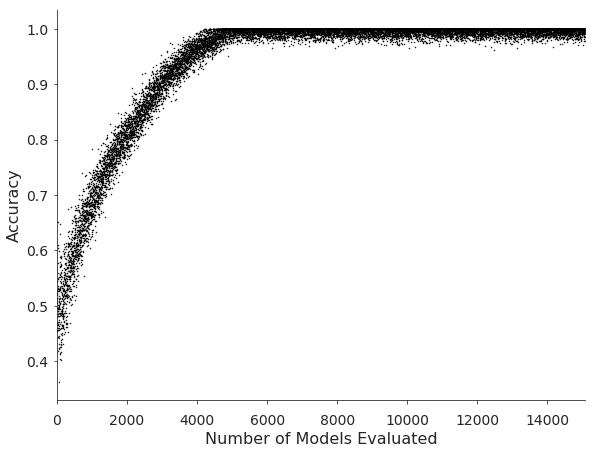

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('white')
xvalues = range(len(history))
yvalues = [i.accuracy for i in history]
ax = plt.gca()
ax.scatter(
    xvalues, yvalues, marker='.', facecolor=(0.0, 0.0, 0.0),
    edgecolor=(0.0, 0.0, 0.0), linewidth=1, s=1)
fig = plt.gcf()
fig.set_size_inches(8, 6)
fig.tight_layout()
ax.tick_params(
    axis='x', which='both', bottom='True', top='False', labelbottom='True',
    labeltop='False', labelsize=14, pad=10)
ax.tick_params(
    axis='y', which='both', left='True', right='False', labelleft='True',
    labelright='False', labelsize=14, pad=5)

plt.xlabel('Number of Models Evaluated', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xlim(0, len(history))
sns.despine()

In [27]:
import time
from datetime import timedelta

start_time = time.time()

s = 0.0
for _ in range(100):
    _, population = eclectic_ga(cycles=4000, population_size=100, sample_size=10)
    s += population[0].accuracy #max(population, key=lambda i: i.accuracy).accuracy
print(s/100)

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)    

0.9940871017982691
Execution took: 0:00:27 (Wall clock time)
